In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

from tensorflow.keras import layers

In [2]:
dataset = pd.read_csv("Alcohol_Sales.csv", 
index_col = 'DATE', parse_dates=['DATE'])

Text(0.5, 1.0, 'Alcohol Sales Quantities from 1992 to 2019')

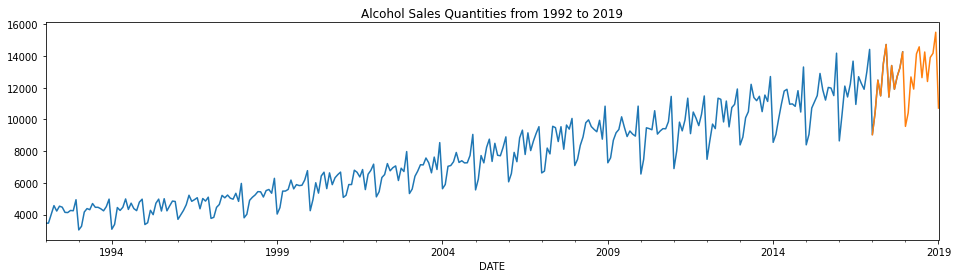

In [3]:
dataset["S4248SM144NCEN"][:"2017"].plot(figsize = (16, 4))
dataset["S4248SM144NCEN"]["2017":].plot(figsize = (16, 4))
plt.title("Alcohol Sales Quantities from 1992 to 2019")

In [4]:
training_data = dataset[:"2017"]['S4248SM144NCEN'].values.reshape(-1, 1)
test_data = dataset["2017":]['S4248SM144NCEN'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training = scaler.fit_transform(training_data)

In [5]:
print(training_data.shape, test_data.shape)

(312, 1) (25, 1)


In [6]:
X_train = []
y_train = []

for i in range(25, 312):
    X_train.append(scaled_training[i-25:i, 0])
    y_train.append(scaled_training[i,0])

In [7]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [9]:
print(X_train.shape)

(287, 25, 1)


In [10]:
import tensorflow as tf 

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

regressor = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape = (X_train.shape[1],1), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = True, activation = tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = True, activation = tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='rmsprop',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
9/9 [==============================] - 6s 27ms/step - loss: 0.0772
Epoch 2/50
9/9 [==============================] - 0s 26ms/step - loss: 0.0201
Epoch 3/50
9/9 [==============================] - 0s 26ms/step - loss: 0.0122
Epoch 4/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0232
Epoch 5/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0110
Epoch 6/50
9/9 [==============================] - 0s 29ms/step - loss: 0.0161
Epoch 7/50
9/9 [==============================] - 0s 26ms/step - loss: 0.0152
Epoch 8/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0190
Epoch 9/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0140
Epoch 10/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0133
Epoch 11/50
9/9 [==============================] - 0s 28ms/step - loss: 0.0144
Epoch 12/50
9/9 [==============================] - 0s 24ms/step - loss: 0.0108
Epoch 13/50
9/9 [==============================] - 0s 26ms/st

In [11]:
dataset_total = pd.concat((dataset["S4248SM144NCEN"][:'2016'], dataset["S4248SM144NCEN"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_data) - 25:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [12]:
test_data.shape

(25, 1)

In [15]:
X_test = []
y_test = []

for i in range(25,50):
    X_test.append(inputs[i-25:i,0])
    y_test.append(inputs[i,0])

In [16]:
X_test = np.array(X_test)

In [19]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

ValueError: Found array with dim 3. Estimator expected <= 2.